<a href="https://colab.research.google.com/github/dineshbabuvaddineni/Deep_Learning/blob/main/Finetuning_Pretrain_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16


In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [4]:
import numpy as np

In [5]:
model1=ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 4s 0us/step


In [6]:
img_path="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/Tajmahal.jpg"

In [7]:
img=image.load_img(img_path,target_size=(224,224))

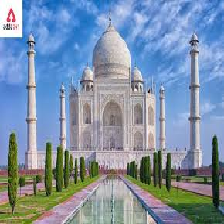

In [8]:
img

In [9]:
img=image.img_to_array(img)

In [10]:
img.shape

(224, 224, 3)

In [11]:
img=np.expand_dims(img,axis=0)

In [12]:
img.shape

(1, 224, 224, 3)

In [13]:
prediction=model1.predict(img)

1/1 [==============================] - 1s 1s/step


In [14]:
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n03788195', 'mosque', 0.72576165),
  ('n03028079', 'church', 0.16179451),
  ('n02699494', 'altar', 0.07739589),
  ('n03877845', 'palace', 0.013687647),
  ('n03447447', 'gondola', 0.010715879)]]

# Fine Tuning Pre-Train model

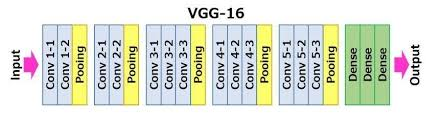

In [ ]:
conv_base=VGG16(weights="imagenet",
                include_top=False,
                input_shape=(150,150,3))
# if we remove include_top it will by defaultly consider it as true.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Our own Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 265)               2171145   
                                                                 
 dense_1 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 16886099 (64.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/training_set",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/test_set",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(150,150)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Min -Max Scaler - converts between 0 -1

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
conv_base.layers

In [ ]:
len(conv_base.layers)

19

In [ ]:
for layer in conv_base.layers:
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 265)               2171145   
                                                                 
 dense_3 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 9250835 (35.29 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

250/250 [==============================] - 2943s 12s/step - loss: 0.7183 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.5000
